# Hands-on Python meets Machine Learning

This python notebook gives a short introduction to python and then tackles the task of supervised learning with feed-forward fully-connected neural networks. In order to illustrate training neural networks, first a minimal example of a neural network is given to understand the mechanics of training a neural network. Second, we have a look at real computer vision task and train a neural network on the CIFAR-10 dataset.

## Python and IPython Notebooks
Python is a widely used general-purpose, high level programming language. It was created by Guido van Rossum in 1991 and further developed by the Python Software Foundation. 

An IPython notebook is made up of a number of cells. Each cell can contain Python code. You can execute a cell by clicking on it and pressing [Shift-Enter]. When you do so, the code in the cell will run, and the output of the cell will be displayed beneath the cell. For example, after running the first cell the notebook looks like this:

In [ ]:
print('Hello World!')

### Variables and data structures in Python

In Python you do not have to declare the type the variable. Just type in the variable and when values will be given to it, then it will automatically know whether the value given would be a int, float or char or even a String.

The most important data structures in Python are lists and dictionaries

In [ ]:
# Python program to declare variables and data structures (# starts a comment in Python)
print('First, different variables are declared:')
myNumber = 3
print(myNumber) 

myNumber2 = 4.5
print(myNumber2) 

myNumber ="helloworld"
print(myNumber) 

print('Then, different data structures:')
myList = [1,2,3,4]
print(myList)

myDict = {'dog name': 'Bello', 'dog age':3}
print(myDict)

### Selection and Functions
In order to make more complex code, selection and functions must be defined. 
Selection in Python is made using the two keywords ‘if’ and ‘elif’ (elseif) and 'else'. 
You can think of functions like a bunch of code that is intended to do a particular task in the whole Python script. Python used the keyword ‘def’ to define a function.

In the following, we provide two examples to illustrate selection and functions. The selection code compares to values and determines the larger one. The function implemented simply adds two arguments to each other. Have a special look at the indentation, that is really important for Python and how code is structured. If you forget about the right indent, the code will not run through.

In [ ]:
# Python program to illustrate selection statement 

num1 = 34
num2 = 12
if(num1>num2): 
    print("num1 is greater") 
elif(num1<num2): 
    print("num1 is smaller") 
else: 
    print("num1 and num2 are equal") 


In [ ]:
# Python program to illustrate how functions are defined

def adder(arg1, arg2): # here the name of the function and the arguments are defined
    result = arg1 + arg2 # this is the body of the function. In this case a simple addition.
    return result # after return the outputs are defined

print('Testing adder with 1 and 5 results in:')
result = adder(2,5) # here we apply the function for the argumens 2 and 5 and store the output in the variable result
print(result) # print the result so we can see what it actually is

print('Testing adder with 1 and -3.5 results in:')
print(adder(1,-3.5)) # another test for the function but we print the output directly
    

**Minitask 1**: Write a function that substracts the large value from the smaller. Name your function *substract_positive*. It recieves two arguments and returns the result of the substraction

In [ ]:
# Tip: operators for comparison in Python: <, >, =<, >=, != (not equal)
# CODE HERE:


Now test your code:

In [ ]:
print(substract_positive(5,10))
print(substract_positive(-3,4.3))
print(substract_positive(2,2))

### Python packages - NumPy and Matplotlib
For python, many packages are available which already include ready to use functions, data structures or operations. You can include these packages in your Notebook in order to use them. 

One of the most important packages is NumPy. It is the fundamental package for scientific computing with Python. It contains among other things: a powerful N-dimensional array object; sophisticated (broadcasting) functions; useful linear algebra, Fourier transform, and random number capabilities

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Therefore this package is often quite useful to visualize your results.

In [ ]:
# importing packages
import numpy as np # this translates to: import package numpy and store it for usage under the name np
import matplotlib.pyplot as plt

But how to use the imported packages? Here is a short example for the relative error. It is defined as:
$$\frac{x-y}{x}$$ where $x$ is the real value and $y$ is the prediction

In [ ]:
def rel_error(x, y):
    """ returns relative error """
    absolute_difference = np.abs(x - y) # np.abs() returns the absolute value so for -2 it returns 2
    real_value = np.maximum(1e-8, np.abs(x)) # np.maximum(arg1,arg2) returns the greater argument
    
    return absolute_difference / real_value

print(rel_error(2,2.5))

## Minimal Example for Gradient descent

The basic idea of how neural networks are trained is by minimizing a loss function. For supervised learning this loss is calculated by comparing the prediction to the actual label. The forward pass is calculating the prediction. The backward pass is calculating the gradient with respect to the parameters that lead to the prediction. This gradient is then used to update the function or network parameters in order to get closer to the optimal value. Now we will investigate a simple neural network with 3 input neurons, 4 hidden neurons and one output neuron. Therefore the network is determined by the function: <br /> 
$$ y_{predict} = a(W_2* a(W_1 * x))$$ <br /> 
where $W_2$ is a matrix for the weights between the output and the hidden layer, $W_1$ for the weights between input and hidden layer, $x$ is a sample of the data in our case three dimensional vector, and $a()$ is the non-linear activation function.

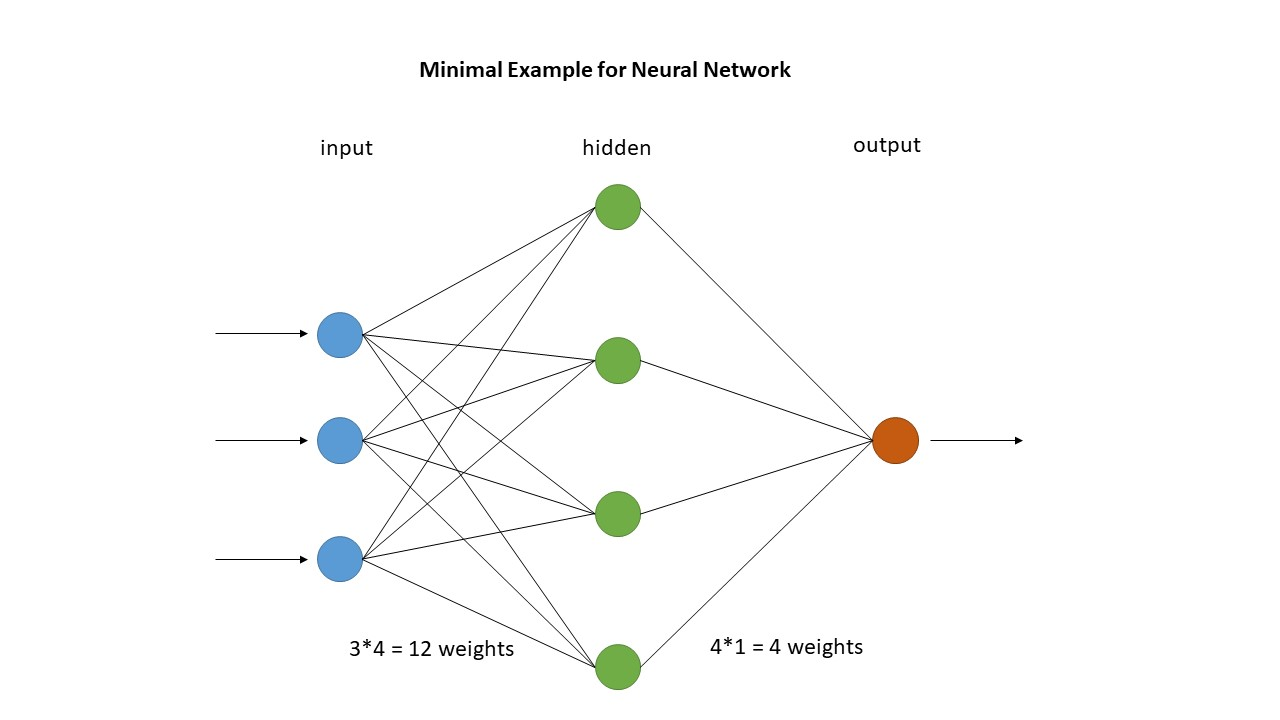

### Initialization of the Neural Network and defining the activation function
First, we will initialize the neural net. This means we set the parameters or weights of the non-linear function to a random value. Training will then adjust the random values to meaningful ones.

In [ ]:
class Min_Neural_Net:
    def __init__(self):
            np.random.seed(10) # for generating the same results
            self.W_1   = np.random.rand(3,4) # input to hidden layer weights
            self.W_2   = np.random.rand(4,1) # hidden layer to output weights
        

Then, we define the non-linear activation function. In our case, we use the sigmoid function $\mathrm{\sigma}(z)$ but other functions like ReLU or tanh are also common choices for non-linear functions. For calculating the gradient, we will also need the derivative of the sigmoid function and thus we define the derivative as well. <br /> 

$$ \mathrm{\sigma}(z) = \frac{1}{1+ \exp^{-z}} $$

$$ \frac{\mathrm{\sigma}(z)}{dz} = \mathrm{\sigma}(z) * (1 - \mathrm{\sigma}(z))$$

In [ ]:
def sigmoid(x, w):
    z = np.dot(x, w)
    return 1/(1 + np.exp(-z))
    
def sigmoid_derivative(x, w):
    return sigmoid(x, w) * (1 - sigmoid(x, w))

plt.plot(np.linspace(-10,10,100),sigmoid(np.eye(100),np.linspace(-10,10,100)))
plt.title('Sigmoid function')
plt.show()

### Forward pass

The forward pass is generating the loss which should be optimizied. Therefore the prediction with the current network weights is compared to the true values by a loss function. This can be a simple substraction (in our case) or other loss functions like the mean squared error. 

**Minitask 2**: Implement the forward pass for this network. The input to the function is the current neural network $NN$, the data $x$ and the labels $y_{true}$. The output should be the loss, which is in our case simply defined the difference between the true labels and the prediction ($y_{true} - y_{predict}$). Further we need to output the values at the hidden neurons for further calculation of the backward pass.

In [ ]:
# Tip: this formula describes how the prediction is caluclated: y_predict = a(W_2* a(W_1 * x))
# Tip: the weights are stored in the neural network object NN
# Tip: you can access the weight W_1 by writing NN.W_1

def forward_pass(NN, x, y_true):
    loss = None
    x_hidden = None
    
    # CODE HERE:

    
    return loss, x_hidden

### Backward pass

The backward pass calculates the gradient with respect to the weights of the network. It looks not intuitive but in the end it is simply applying the differentiation rules like the chain rule in order to recieve the right formula. This gradient is then used to update the weights. The general update step is:

$$w_{new} = w - lr * \nabla_{w} \mathrm{loss}(w)$$

where $w$ are the weights and $lr$ is the learning rate. The learning rate is a important hyperparameter which determines how large the update step should be. A too large update step might lead to never converging to the optimal point (minimum of the loss). If the learning rate is too small training might take very long and the model mit get stuck in a small local minimum but not the global minimum.

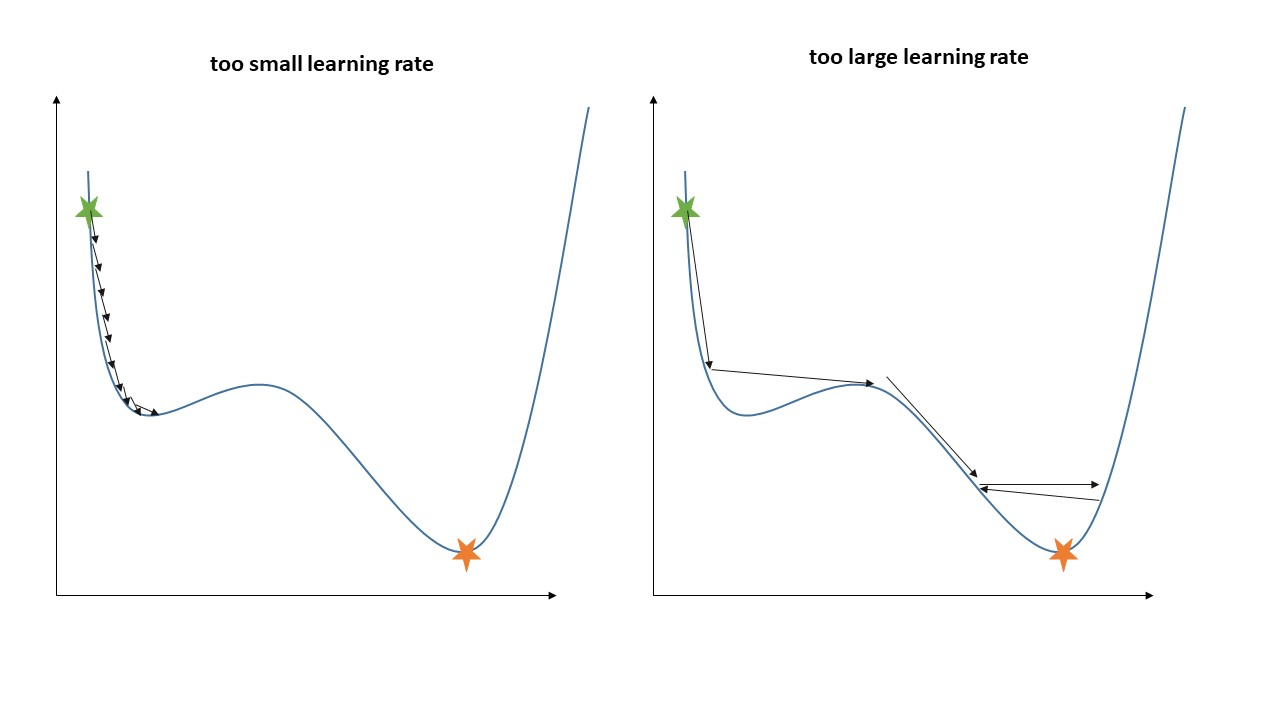

The green star denotes the inital value, the orange star is the global minimum we want to find. The arrows symbolize consecutive gradient descent steps.

In [ ]:
def backward_pass(NN, loss, x_hidden, x):
    learning_rate = 0.1
    
    # gradients for hidden to output weights
    g_w_2 = np.dot(x_hidden.T, - loss * sigmoid_derivative(x_hidden, NN.W_2))
    # gradients for input to hidden weights
    g_w_1 = np.dot(x.T, np.dot(- loss * sigmoid_derivative(x_hidden, NN.W_2), NN.W_2.T) * sigmoid_derivative(x, NN.W_1))
    
    # update weights
    NN.W_1 = NN.W_1 - learning_rate * g_w_1
    NN.W_2 = NN.W_2 - learning_rate * g_w_2

    return NN

### Training

Now let's put everything together. So we use the forward pass for calculating the loss, the backward pass for calculating the gradient, and the gradient for updating the network weights. We will do this procedure multiple times until convergence.

So have a look at a small example. First, we initialize the weights of the neural network which are the actual brain. Then we generate some data and labels for it. Here the data is $X$ and the labels are $y$. Further, we have to define how long we want to iterate. Then we do these iterations and then visualize the calculated loss. As we want to minimize the loss, the curve should decrease towards zero.

In [ ]:
# Initializations
neural_network = Min_Neural_Net()
print('Random starting input to hidden weights: ')
print(neural_network.W_1)
print('Random starting hidden to output weights: ')
print(neural_network.W_2)

# Some data to train the network on
X = np.array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
y = np.array([[0, 1, 1, 0]]).T

# Defining how many updates should be conducted
iterations = 1000
log_loss = []

for i in range(iterations):
    loss, x_hidden = forward_pass(neural_network, X, y)
    neural_network = backward_pass(neural_network, loss, x_hidden, X)
    log_loss.append(np.abs(np.sum(loss)))
    

plt.plot( np.linspace(0,iterations, iterations),log_loss, label='train')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()
    
    

### Prediction

After training the prediction is the actual value you would want from a neural network. It is the output of the network for a certain data point while the trained weights are the brain of the network. So let's have a look how well our network is performing on the data we used for training.

**Minitask 3**: Write a function named *prediction* which takes the trained neural network and data as input and output the prediction vector.

In [ ]:
# Tip: the prediction is almost the same as the forward pass

def prediction(NN, x):
    y_predict = None
    
    # CODE HERE:


    return y_predict

Now test your code:

In [ ]:
print('The final prediction after training for the data is:')
print(prediction(neural_network, X))
print('The absolute error between true values and prediction is:')
print(y-prediction(neural_network, X))    

## Computer Vision task

Now we will have a look at a larger neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset. Run the next cell to perfom the setup for the task.

In [ ]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from scripts.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

### Load the data
Now that you have implemented and understood how optimization for neural networks in supervised learning works on toy data. It's time to load the CIFAR-10 data, so we can use it to train a classifier on a real dataset. First, we check how this dataset looks like to get an better impression. Further, for real machine learning we have to split the data in training, validation and test set. The training set will be used to train the neural network, the validation set is for finding the fitten hyperparameters (we come to this later), and the test set is for finnaly checking if the mnetwork we trained is performing well. Run the next cell to load the data.

In [ ]:
from scripts.data_utils import load_CIFAR10
from scripts.vis_utils import visualize_cifar10

def get_CIFAR10_data(num_training=17000, num_validation=1000, num_test=1000, num_dev=500):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the linear classifier. 
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'datasets/'
    X, y = load_CIFAR10(cifar10_dir)
    
    # Our training set will be the first num_train points from the original
    # training set.
    mask = range(num_training)
    X_train = X[mask]
    y_train = y[mask]
    
    
    # Our validation set will be num_validation points from the original
    # training set.
    mask = range(num_training, num_training + num_validation)
    X_val = X[mask]
    y_val = y[mask]
    
    # We use a small subset of the training set as our test set.
    mask = range(num_training + num_validation, num_training + num_validation + num_test)
    X_test = X[mask]
    y_test = y[mask]
    
    # We will also make a development set, which is a small subset of
    # the training set. This way the development cycle is faster.
    mask = np.random.choice(num_training, num_dev, replace=False)
    X_dev = X_train[mask]
    y_dev = y_train[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis = 0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    X_dev -= mean_image
    
    # Preprocessing: reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))
    X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

    return X, y, X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev


# Invoke the above function to get our data.
X_raw, y_raw, X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev= get_CIFAR10_data()
print('Train data shape: {}'.format(X_train.shape))
print('Train labels shape:{}'.format(y_train.shape))
print('Validation data shape: {}'.format(X_val.shape))
print('Validation labels shape:{}'.format(y_val.shape))
print('Test data shape: {}'.format(X_test.shape))
print('Test labels shape: {}'.format(y_test.shape))
print('dev data shape: {}'.format(X_dev.shape))
print('dev labels shape: {}'.format(y_dev.shape))

# visualize raw data
visualize_cifar10(X_raw, y_raw)

### Train a Network
As before, we will use gradient descent (in particular stochastic gradient descent (SGD)) to train our network. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate. This is meaningful in order to allow large update steps in the beginning and smaller at the end. 

Run the next cell to create a Neural Network for the CIFAR-10 dataset with one hidden layer of 50 neurons. The input size applies to the size of the pictures - pixels $32*32$ and RGB channels $3$ - in the dataset. As we have 10 classes we want to predict the output layer has 10 neurons.

In [ ]:
# Create a neural network for the task
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

Now, lets train the network for a few iterations and then check the accuracy of the prediction on the validation set. 

In [ ]:
# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.5, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: {}'.format(val_acc))

### Debug the training
With the default hyperparameters we provided above, you should get a validation accuracy of about 0.26 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

To visualize the loss, accuracies and weights of the first layer, run the next cell.

In [ ]:
from scripts.vis_utils import visualize_grid

# Plot the loss function and train / validation accuracies
plt.subplots(nrows=2, ncols=1)

plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')

plt.tight_layout()
plt.show()

# Visualize the weights of the network

def show_net_weights(net):
    fig = plt.figure(figsize=(20,20))
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

### Tune your hyperparameters

**What's wrong?** Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks. You have to experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength in order to determine the best fitting values. For this exercise, we already found some good performing values. But if you want to you can also go to the file *exercise_code.classifiers.neural_net* and change the function *neuralnetwork_hyperparameter_tuning* to test out tuning your self.

**Approximate results**. With this type of network, you should aim to achieve a classification accuracy of greater than 48% on the validation set. To achieve even better validation results you would have to implement further techniques like drop-out layers or batch normalization. If your interested in this have a look at:
1. https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5 
2. https://towardsdatascience.com/batch-normalization-in-neural-networks-1ac91516821c
3. https://towardsdatascience.com/how-to-increase-the-accuracy-of-a-neural-network-9f5d1c6f407d

Only comment in the code in the next cell and run it if you want to tune the hyperparameters yourself and are logged in so you have enough computational resources. Running this code might take some time.


In [ ]:
from scripts.neural_net import TwoLayerNet, neuralnetwork_hyperparameter_tuning
from scripts.model_savers import save_two_layer_net
from scripts.data_utils import get_CIFAR10_data_full

### COMMENT IN THE FOLLOWING LINES IF YOU WANT TO TUNE YOUR SELF ON A LARGER DATASET - ONLY POSSIBLE IF LOGGED IN TO KAGGLE DUE TO RESOURCE CONSTRAINTS

# X_raw, y_raw, X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev= get_CIFAR10_data_full() # load three times as large dataset as used before

# best_net, all_classifiers = neuralnetwork_hyperparameter_tuning(X_train, y_train, X_val, y_val) # this is the tuning part. If you want to change the hyperparameters change the function in the neural net util.

# show_net_weights(best_net) # visualize the weights of the best network
# save_two_layer_net(best_net) # save the best net to your models folder

### Check the trained network

We already provide a trained network for you. Run the next cell to visualize the weights of the trained network with tunes hyperparameters. 

**Minitask 4**: What do you observe compared to the previous visualization?

In [ ]:
from scripts.model_savers import load_two_layer_net

net_stored = load_two_layer_net()
show_net_weights(net_stored)

### Test your model
The final step for every machine learing task is testing the trained model. This test dataset is only touched at the end of all tuning in order to ensure that you did not train your network to perform well on the test set. Then the testing shows if the model really generalizes the data well.

In [ ]:
test_acc = (net_stored.predict(X_test) == y_test).mean() 
# test_acc = (best_net.predict(X_test) == y_test).mean() # comment in this line and out the line above if you want to test the model you tuned

print('Test accuracy: ', test_acc)

We hope this notebook gave you a first impression on Python, Jupyter Notebooks, and how neural networks are trained.
There is potenially a lot more you can discover in this notebook and about machine learning and there are many online resources to learn more about Python. So in case you want to try out more your self here are some references and courses.

## References
1. https://www.geeksforgeeks.org/python-3-basics/
2. https://numpy.org/
3. https://matplotlib.org/
4. https://medium.com/datathings/neural-networks-and-backpropagation-explained-in-a-simple-way-f540a3611f5e
5. https://towardsdatascience.com/a-step-by-step-implementation-of-gradient-descent-and-backpropagation-d58bda486110

## Further Courses
1. https://de.coursera.org/learn/machine-learning
2. https://open.hpi.de/courses/semanticweb2017
3. https://www.udemy.com/course/complete-python-bootcamp/